# Creating a df with the paths

In [43]:
import pandas as pd
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt

In [34]:
apple_path = 'Data/Apple'
banana_path = 'Data/Banana'
carambola_path = 'Data/Carambola'
guava_path = 'Data/Guava'
kiwi_path = 'Data/Kiwi'
mango_path = 'Data/Mango'
muskmelon_path = 'Data/muskmelon'
orange_path = 'Data/Orange'
peach_path =  'Data/Peach'
pear_path = 'Data/Pear'
persimmon_path = 'Data/Persimmon'
pitaya_path = 'Data/Pitaya'
plum_path = 'Data/Plum'
pomegranate_path = 'Data/Pomegranate'
tomatoes_path = 'Data/Tomatoes'


In [35]:
list_of_paths = [apple_path, banana_path, carambola_path, guava_path,
                kiwi_path, mango_path, muskmelon_path, orange_path,
                peach_path, pear_path, persimmon_path, pitaya_path,
                plum_path, pomegranate_path, tomatoes_path]

In [36]:
list_of_paths[0]

'Data/Apple'

In [37]:
def data_frame_gen(list_of_paths):
    all_files = []
    for path in list_of_paths:
        
        for dirpath, _, filenames in os.walk(path):
            for fn in filenames:
                all_files.append(os.path.join(dirpath, fn))
    
    img_df = pd.DataFrame({'Path': all_files})
    
    img_df['Fruit'] = img_df['Path'].apply(lambda p: p.split(os.sep)[1])
    img_df = img_df[['Fruit', 'Path']]            
    
    return img_df


In [38]:
df = data_frame_gen(list_of_paths)

In [39]:
df.groupby('Fruit').count()


,Path
Fruit,
Apple,11186
Banana,3027
Carambola,2080
Guava,19699
Kiwi,8466
Mango,4154
Orange,3012
Peach,2629
Pear,3012


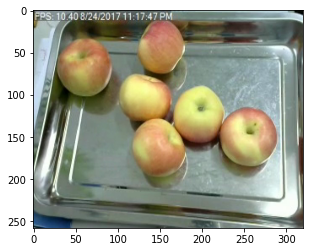

In [47]:
img = cv2.imread(df['Path'][1], cv2.COLOR_BGR2RGB)
img_GRB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_GRB)
plt.show()

In [49]:
df.shape

(70552, 2)

In [54]:
df

,Fruit,Path
0,Apple,Data/Apple/.DS_Store
1,Apple,Data/Apple/Apple E/Apple E08152.png
2,Apple,Data/Apple/Apple E/Apple E117.png
3,Apple,Data/Apple/Apple E/Apple E103.png
4,Apple,Data/Apple/Apple E/Apple Ee01601.png
...,...,...
70547,Tomatoes,Data/Tomatoes/Tamotoes00485.png
70548,Tomatoes,Data/Tomatoes/Tamotoes001605.png
70549,Tomatoes,Data/Tomatoes/Tamotoes001611.png
70550,Tomatoes,Data/Tomatoes/Tamotoes001177.png


In [78]:
## Removing DS_store
for path in df.Path:
    count_to_drop = 0 
    if 'DS_Store'in str(path):
        df = df.drop(df.index[count_to_drop])
    count_to_drop = count_to_drop + 1
        

In [79]:
df.shape

(70549, 2)